In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('./data/online_table3.csv')
df = df_raw.transpose()

df.columns = df.iloc[0]
df = df.iloc[1:]
# df

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipython-7.6.1-py3.7.egg/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
features = df.iloc[:, :15]
features

Unnamed: 0,rmp,tau,apthr,apamp,ahpamp,aphw,rheo,cap,maxfreq,adratio,ri,sag,f_i_curve_slope,avg_isi,latency
Gad2-IRES-Cre__L5__inh,-70.8615,16.2424,-39.5357,58.3393,20.5536,0.405714,190,0.0578878,79,0.594302,200.861,0.102355,0.503032,26.0402,0.0121821
Sst-IRES-Cre__L6__inh,-71.4967,20.7112,-39.7996,63.9761,20.7629,0.499375,135.294,0.0848721,74.875,0.626412,241.711,0.101243,0.54227,41.6909,0.0307912
Nos1-CreERT2|Sst-IRES-FlpO__L5-L6__inh,-63.3591,43.2593,-36.3875,69.3375,16.9134,0.755429,49.7143,0.181578,21.6571,0.442831,300.023,0.0391566,0.161289,101.849,0.038256
Oxtr-T2A-Cre__L5-L6__inh,-70.5803,17.2149,-38.3125,68.6198,17.9479,0.676667,146.667,0.0881367,40.3333,0.570519,192.6,0.0621511,0.241714,48.8066,0.0350033
Rbp4-Cre_KL100__L4__exc,-73.6372,20.783,-38.0536,73.7574,9.15179,0.813095,122.857,0.145167,18.4762,0.392579,163.213,0.0937625,0.127043,118.158,0.0553324
Sim1-Cre_KJ18__L4-L6__exc,-70.8498,19.9791,-39.9961,80.3936,8.41797,0.876875,107.188,0.112104,26.4375,0.498797,148.261,0.0947593,0.174502,94.1868,0.04678
Chrna2-Cre_OE25__L5__inh,-70.3895,25.3424,-40.8287,72.25,15.3222,0.583448,64.1379,0.0830752,48.2759,0.401792,277.619,0.0934595,0.373752,50.1926,0.0299605
Tlx3-Cre_PL56__L4-L6__exc,-70.1681,25.1368,-36.7363,75.0915,11.1296,0.907,94.3902,0.137681,22.425,0.523817,178.545,0.0820956,0.157581,90.8237,0.0544727
Chrna2-Cre_OE25|Pvalb-T2A-Dre__L5-L6__inh,-71.0727,9.91488,-36.7539,55.6719,24.0391,0.46,202.5,0.0471895,143.375,0.867157,158.633,0.0762185,1.06088,11.7529,0.008785
Chat-IRES-Cre-neo__L2/3__inh,-71.3234,11.5467,-40.1229,75.1153,9.17083,0.743556,106.222,0.0425594,22.6,0.405158,210.926,0.0752513,0.154479,108.456,0.0123476


In [4]:
# calculate std dev for each gene, find best 100

genes_raw = {}

for i in range(32, 45768):
    gene = df.iloc[:, i]
    genes_raw[i] = np.std(gene)

ranked = sorted(genes_raw.items(), key=lambda kv: kv[1])
top = ranked[45636:]

100

In [14]:
# collect all genes with std dev > 0

genes = []
for gene in genes_raw:
    if genes_raw[gene] > 0:
        genes.append(gene)

[32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 75,
 77,
 78,
 79,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 150,
 151,
 152,
 153,
 155,
 158,
 159,
 160,
 161,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 178,
 179,
 180,
 181,
 182,
 184,
 186,
 187,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 199,
 200,
 201,
 202,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 214,
 215,
 216,
 217,
 218,
 220,
 221,
 222,
 223,
 224,
 226,
 227,
 228,
 229,
 230,
 231,

In [15]:
# linear regression on the 100 genes with highest std dev

x = features
lr_train_r2_raw = {}
lr_test_r2_raw = {}
lr_train_rmse_raw = {}
lr_test_rmse_raw = {}

# store test vs. pred for plotting
test = {}
pred = {}

for gene in top:
    y = df.iloc[:, gene[0]]
    
    r2_train = []
    r2_test = []
    rmse_train = []
    rmse_test = []
    
    # 4-fold CV

    fold = 4

    for i in range(fold):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
        
        # store into test dictionary
        test[gene[0]] = y_test

        lr = LinearRegression()
        lr.fit(x_train, y_train)

        pred_train_lr = lr.predict(x_train)
        r2_train.append(r2_score(y_train, pred_train_lr))
        rmse_test.append(np.sqrt(mean_squared_error(y_train, pred_train_lr)))

        pred_test_lr = lr.predict(x_test)
        
        # store into pred dictionary
        pred[gene[0]] = pred_train_lr
        
        r2_test.append(r2_score(y_test, pred_test_lr))
        rmse_test.append(np.sqrt(mean_squared_error(y_test, pred_test_lr)))

    r2_train_avg = sum(r2_train) / fold
    lr_train_r2_raw[gene[0]] = r2_train_avg
    rmse_train_avg = sum(rmse_train) / fold
    lr_train_rmse_raw[gene[0]] = rmse_train_avg
    
    r2_test_avg = sum(r2_test) / fold
    lr_test_r2_raw[gene[0]] = r2_test_avg
    rmse_test_avg = sum(rmse_test) / fold
    lr_test_rmse_raw[gene[0]] = rmse_test_avg
    
lr_train_r2 = sorted(lr_train_r2_raw.items(), key=lambda kv: kv[1])
lr_test_r2 = sorted(lr_test_r2_raw.items(), key=lambda kv: kv[1])

lr_train_rmse = sorted(lr_train_rmse_raw.items(), key=lambda kv: kv[1])
lr_test_rmse = sorted(lr_test_rmse_raw.items(), key=lambda kv: kv[1])

lr_test_r2

[(5841, -1.6094760395289085),
 (40224, -1.4986088581013437),
 (3031, -1.0653105015727484),
 (38892, -1.0124575072736453),
 (44126, -0.7264771413728142),
 (37056, -0.5843351746436669),
 (31453, -0.5354739583194414),
 (31957, -0.3874260762174606),
 (4720, -0.2890132756728976),
 (34876, -0.2567832475948023),
 (4388, -0.24359341664671472),
 (38811, -0.21231200037097642),
 (37017, -0.17085644229996516),
 (37157, -0.15835047352282933),
 (31956, -0.1558099407222241),
 (4473, -0.12172455951718361),
 (33869, -0.0981942255511235),
 (25685, -0.020805106731993872),
 (5784, 0.02442494159846134),
 (4389, 0.054904353760671654),
 (39755, 0.07685990705330159),
 (45438, 0.07971931934174462),
 (8543, 0.11674327951546004),
 (31579, 0.12576723143850863),
 (39839, 0.12713751445562704),
 (38318, 0.17061989067561245),
 (38583, 0.21413591158521778),
 (41878, 0.23330693090516466),
 (25226, 0.23467299376019052),
 (38310, 0.2389291646265102),
 (35091, 0.24017841308897325),
 (4887, 0.261220738183078),
 (38878, 0.2

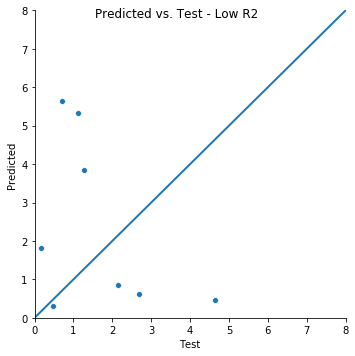

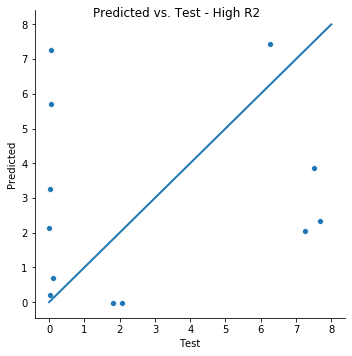

In [23]:
# plot pred vs. test for high and low r2 values (4389, 41257)

low_test = test[4389]
low_pred = pred[4389]

high_test = test[41257]
high_pred = pred[41257]

low = pd.DataFrame(list(zip(low_test, low_pred)), columns=["Test", "Predicted"])
high = pd.DataFrame(list(zip(high_test, high_pred)), columns=["Test", "Predicted"])

rel1 = sns.relplot(x="Test", y="Predicted", data=low)
rel1.set(xlim=(0, 8), ylim=(0, 8))
fig1 = rel1.fig
fig1.suptitle("Predicted vs. Test - Low R2")
plt.plot([0, 8], [0, 8], linewidth=2)

rel2 = sns.relplot(x="Test", y="Predicted", data=high)
rel1.set(xlim=(0, 8), ylim=(0, 8))
fig2 = rel2.fig
fig2.suptitle("Predicted vs. Test - High R2")
plt.plot([0, 8], [0, 8], linewidth=2)

plt.show()

In [20]:
# lasso regression on the genes with positive std dev

x = features
lasso_train_r2_raw = {}
lasso_test_r2_raw = {}

lasso_train_rmse_raw = {}
lasso_test_rmse_raw = {}

# store test vs. pred for plotting
test_genes = {}
pred_genes = {}

# tops for top100 stddev and genes for all
for gene in top:
    y = df.iloc[:, gene[0]]
    
    r2_train = []
    r2_test = []
    rmse_train = []
    rmse_test = []

    fold = 4

    for i in range(fold):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

        # store into test dictionary
        test_genes[gene[0]] = y_test
        
        lasso = Lasso(alpha=0.01)
        lasso.fit(x_train, y_train)

        pred_train_lasso = lasso.predict(x_train)
        r2_train.append(r2_score(y_train, pred_train_lasso))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))

        pred_test_lasso = lasso.predict(x_test)
        
        # store into pred dictionary
        pred_genes[gene[0]] = pred_train_lr
        
        r2_test.append(r2_score(y_test, pred_test_lasso))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,pred_test_lasso)))

    # Average scores from cross validation
    r2_train_avg = sum(r2_train) / fold
    lasso_train_r2_raw[gene] = r2_train_avg
    rmse_train_avg = sum(rmse_train) / fold
    lasso_train_rmse_raw[gene] = rmse_train_avg
    
    
    r2_test_avg = sum(r2_test) / fold
    lasso_test_r2_raw[gene] = r2_test_avg
    rmse_test_avg = sum(rmse_test) / fold
    lasso_test_rmse_raw[gene] = rmse_test_avg

    
lasso_train_r2 = sorted(lasso_train_r2_raw.items(), key=lambda kv: kv[1])
lasso_test_r2 = sorted(lasso_test_r2_raw.items(), key=lambda kv: kv[1])

lasso_train_rmse = sorted(lasso_train_rmse_raw.items(), key=lambda kv: kv[1])
lasso_test_rmse = sorted(lasso_test_rmse_raw.items(), key=lambda kv: kv[1])

lasso_test_r2

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5305729186085415, tolerance: 0.032517656417332376
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05558622854942996, tolerance: 0.034712414199783895
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20678722886232492, tolerance: 0.03103778085327643
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/l

{38068: Ntsr1-Cre_GN220__L6__exc                  0.0369584
 Pvalb-IRES-Cre__L6__inh                           0
 Nos1-CreERT2|Sst-IRES-FlpO__L5-L6__inh            0
 Gad2-IRES-Cre__L5__inh                       1.9497
 Sst-IRES-Cre__L5__inh                          0.05
 Htr3a-Cre_NO152__L4__inh                    6.20916
 Vipr2-IRES2-Cre__L1-L6__inh                 3.99636
 Nr5a1-Cre__L4__exc                                0
 Nos1-CreERT2__L1-L4__inh                    4.03421
 Sim1-Cre_KJ18__L4-L6__exc                  0.027027
 Vip-IRES-Cre__L4__inh                        7.3644
 Esr2-IRES2-Cre__L5-L6__exc                        0
 Name: 19130, dtype: object,
 33869: Rbp4-Cre_KL100__L4__exc                       6.61863
 Htr3a-Cre_NO152__L4__inh                     0.253683
 Sst-IRES-Cre__L6__inh                         6.55224
 Pvalb-IRES-Cre__L6__inh                       7.02054
 Chrna2-Cre_OE25__L6__inh                      3.95256
 Htr3a-Cre_NO152|Pvalb-T2A-Dre__L5-L6__inh    

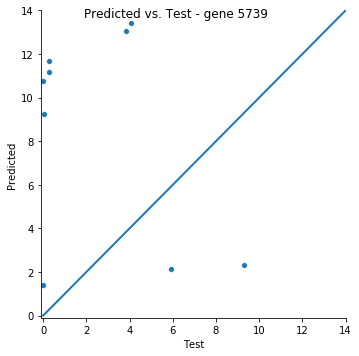

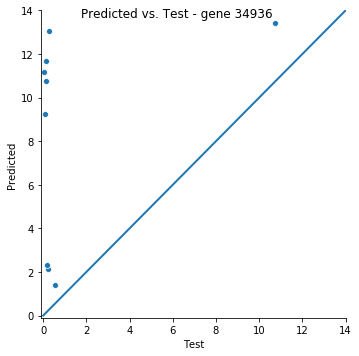

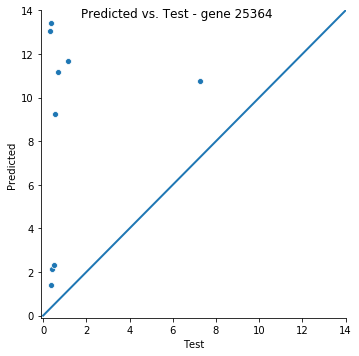

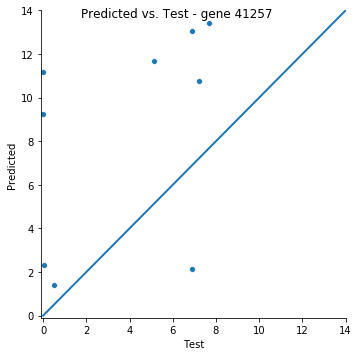

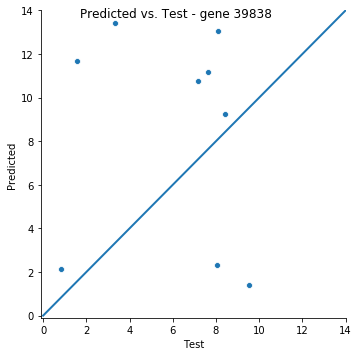

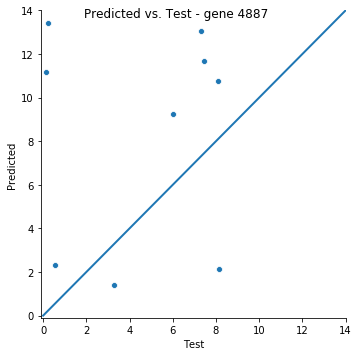

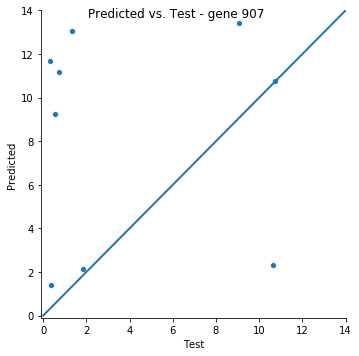

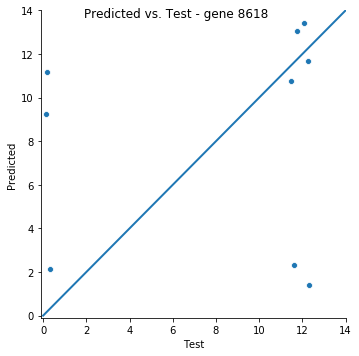

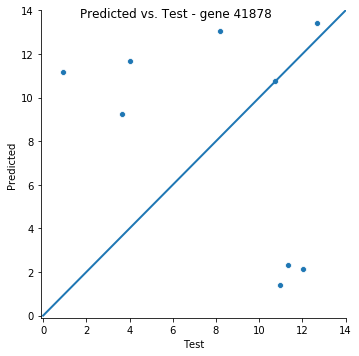

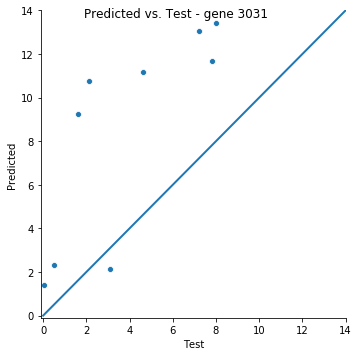

In [63]:
# plot pred vs test

# low_test = test[4389]
# low_pred = pred[4389]

# high_test = test[41257]
# high_pred = pred[41257]

# low = pd.DataFrame(list(zip(low_test, low_pred)), columns=["Test", "Predicted"])
# high = pd.DataFrame(list(zip(high_test, high_pred)), columns=["Test", "Predicted"])

# rel1 = sns.relplot(x="Test", y="Predicted", data=low)
# rel1.set(xlim=(0, 8), ylim=(0, 8))
# fig1 = rel1.fig
# fig1.suptitle(f"Predicted vs. Test - gene{i}")
# plt.plot([0, 8], [0, 8], linewidth=2)

# rel2 = sns.relplot(x="Test", y="Predicted", data=high)
# rel1.set(xlim=(0, 8), ylim=(0, 8))
# fig2 = rel2.fig
# fig2.suptitle(f"Predicted vs. Test - gene{i}")
# plt.plot([0, 8], [0, 8], linewidth=2)

# pick 10 random genes with various positive r2 values 
test_set = [5739, 34936, 25364, 41257, 39838, 4887, 907, 8618, 41878, 3031]
# test_genes

for i in test_set:
    test = test_genes[i]
    pred = pred_genes[i]
    
    data = pd.DataFrame(list(zip(test, pred)), columns=["Test", "Predicted"])
    
    rel = sns.relplot(x="Test", y="Predicted", data=data)
    rel.set(xlim=(-.1, 14), ylim=(-.1, 14))
    fig = rel.fig
    fig.suptitle(f"Predicted vs. Test - gene {i}")
    plt.plot([0, 14], [0, 14], linewidth=2)
    
plt.show()

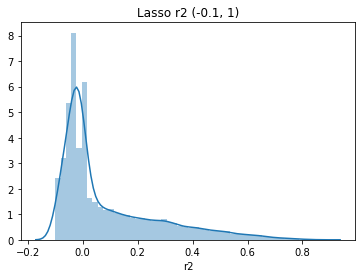

4750
% genes out of range:  61.91742258367219


In [72]:
# plot histogram of r2 in the range (-0.1, 1)

# r2
r2_trimmed = [x[1] for x in lasso_test_r2 if x[1] < 1 and x[1] > -0.1]
r2_trimmed2 = [x[1] for x in lasso_test_r2 if x[1] > 0.1]

hist1 = sns.distplot(r2_trimmed)
plt.title('Lasso r2 (-0.1, 1)')
plt.xlabel('r2')
plt.show()

print(len(r2_trimmed2))

print('% genes out of range: ', (len(lasso_test_r2) - len(r2_trimmed))*100/len(lasso_test_r2))

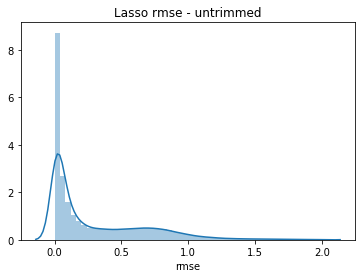

In [57]:
# plot histogram of rmse
hist2 = sns.distplot([x[1] for x in lasso_test_rmse if x[1] < 2], bins=50)
plt.title('Lasso rmse - untrimmed')
plt.xlabel('rmse')
plt.show()

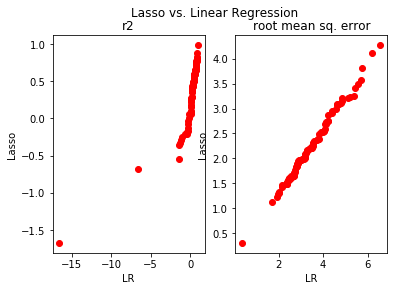

In [25]:
# Plot lasso vs. linear regression to determine performance
# MATPLOTLIB

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Lasso vs. Linear Regression')
ax1.plot([i[1] for i in lr_test_r2], [i[1] for i in lasso_test_r2], 'ro')
ax1.set_title('r2')
ax1.set_ylabel('Lasso')
ax1.set_xlabel('LR')
ax2.plot([i[1] for i in lr_test_rmse], [i[1] for i in lasso_test_rmse], 'ro')
ax2.set_title('root mean sq. error')
ax2.set_ylabel('Lasso')
ax2.set_xlabel('LR')
plt.show()

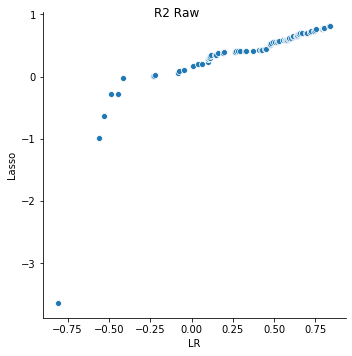

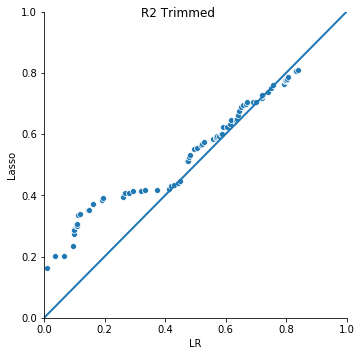

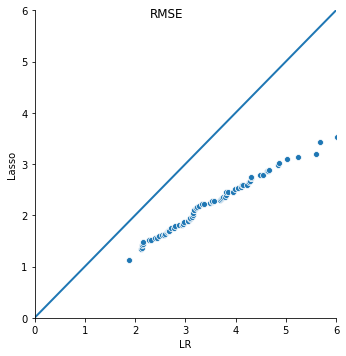

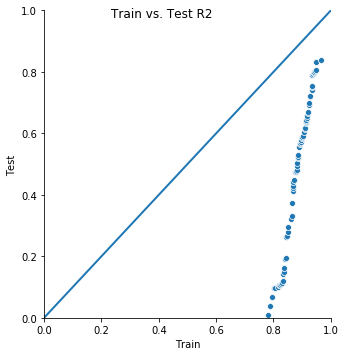

In [53]:
# plot using SEABORN

# create pandas dataframe for scatter plot input
lr_r2 = [i[1] for i in lr_test_r2]
lasso_r2 = [i[1] for i in lasso_test_r2]

lr_rmse = [i[1] for i in lr_test_rmse]
lasso_rmse = [i[1] for i in lasso_test_rmse]

data_r2 = pd.DataFrame(list(zip(lr_r2, lasso_r2)), columns=["LR", "Lasso"])
data_rmse = pd.DataFrame(list(zip(lr_rmse, lasso_rmse)), columns=["LR", "Lasso"])


# train_lr_r2 = [i[1] for i in lr_train_r2]
# train_lasso_r2 = [i[1] for i in lasso_train_r2]

# t_data_r2 = pd.DataFrame(list(zip(train_lr_r2, lr_r2)), columns=["Train", "Test"])
# t_data_rmse = pd.DataFrame(list(zip(train_lasso_r2, lasso_r2)), columns=["Train", "Test"])

# plot raw r2
rel1 = sns.relplot(x="LR", y="Lasso", data=data_r2)
fig1 = rel1.fig
fig1.suptitle("R2 Raw")

# plot r2 [0, 1]
rel2 = sns.relplot(x="LR", y="Lasso", data=data_r2)
rel2.set(xlim=(0, 1), ylim=(0, 1))
plt.plot([0, 1], [0, 1], linewidth=2)
fig2 = rel2.fig
fig2.suptitle("R2 Trimmed")

# plot rmse
rel3 = sns.relplot(x="LR", y="Lasso", data=data_rmse)
rel3.set(xlim=(0, 6), ylim=(0, 6))
fig3 = rel3.fig
plt.plot([0, 6], [0, 6], linewidth=2)
fig3.suptitle("RMSE")

# plot test vs. train
rel2 = sns.relplot(x="Train", y="Test", data=t_data_r2)
rel2.set(xlim=(0, 1), ylim=(0, 1))
plt.plot([0, 1], [0, 1], linewidth=2)
fig2 = rel2.fig
fig2.suptitle("Train vs. Test R2")

plt.show()

In [63]:
# sort genes by r2 scores
sorted_genes = sorted(lasso_test_r2, key=lambda kv: kv[1])
# sorted_genes contains 38364 genes
top1000 = sorted_genes[37364:]

In [6]:
# Store all models into external file
import pickle

# translate entrez ID to gene names 
import csv

ID = {}

file = './data/entrenz_symbol_s.csv'
with open(file, newline='') as csvfile:
    table = csv.reader(csvfile)

    for row in table:
        ID[row[0]] = row[1]

# total 38364 genes
# only mapping 12205 genes with known ID mapping
models = {}

x = features

for gene in genes:
    
    y = df.iloc[:, gene]
    
    r2 = []
    rmse = []
    
    fold = 4
    
    for i in range(fold):

        lasso = Lasso(alpha=0.01)
        lasso.fit(x, y)
        
        pred_lasso = lasso.predict(x)
        r2.append(r2_score(y, pred_lasso))
        rmse.append(np.sqrt(mean_squared_error(y, pred_lasso)))
        
    r2_avg = sum(r2)/fold
    rmse_avg = sum(rmse)/fold
    std_dev = np.std(y)
    
    try:
        gene_name = str(df.columns[gene])

        models[ID[gene_name]] = [lasso, f"r2: {r2_avg}",f"rmse: {rmse_avg}", f"std dev: {std_dev}"]
        
    except:
        continue


filename = "lasso_models.sav"
pickle.dump(models, open(filename, 'wb'))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013603914492811953, tolerance: 0.013276478637086147
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013603914492811953, tolerance: 0.013276478637086147
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013603914492811953, tolerance: 0.013276478637086147
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/skle

In [62]:
# load models from pickle to verify

loaded_models = pickle.load(open("lasso_models.sav", 'rb'))
len(loaded_models)

12205